In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.DataFrame({'Max':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                   'Min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18] })

In [39]:
df

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


<AxesSubplot:>

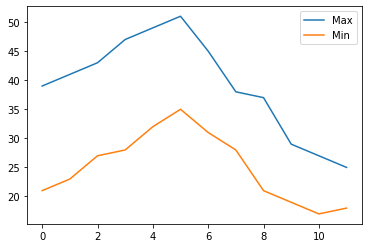

In [54]:
x = df['Max']
y = df['Min']
df.plot()

Text(0, 0.5, 'Max Min Temperature')

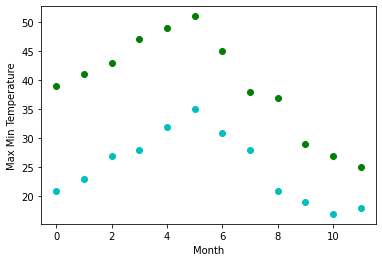

In [55]:
plt.plot(months,x,'go')
plt.plot(months,y,'co')
plt.xlabel('Month')
plt.ylabel('Max Min Temperature')

In [51]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      x, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      y, [-40, 20, 0])

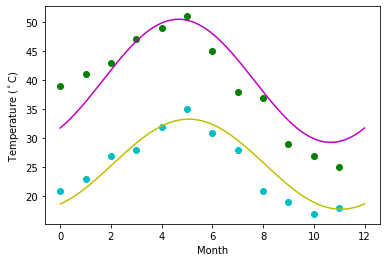

In [53]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, x, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, y, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [57]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [58]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [97]:
labels = ['male','Female']
sizes = titanic['sex'].value_counts()
sizes

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x107c00b4be0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'Female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

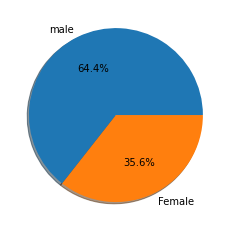

In [98]:
plt.pie(sizes,labels=labels,autopct = '%1.1f%%', shadow = True)

In [99]:
sex = round((titanic['sex'].value_counts())/len(titanic)*100,2)
sex

male      64.35
female    35.57
Name: sex, dtype: float64